In [300]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
from sklearn import preprocessing
df=pd.read_csv('Used Cars.csv')
pd.set_option('max_columns',None)
pd.set_option('max_rows',50)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [301]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [302]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [303]:
print(df.isnull().sum())
print("Dataframe shape is "+ str(df.shape))

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
Dataframe shape is (6019, 14)


In [304]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [305]:
df = df.rename(columns={"Kilometers_Driven":"Km","Fuel_Type":"Fuel","Owner_Type":"Ownership"})
df.head()

,Unnamed: 0,Name,Location,Year,Km,Fuel,Transmission,Ownership,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [306]:
print(df.isnull().sum())
print("Dataframe shape is "+ str(df.shape))

Unnamed: 0         0
Name               0
Location           0
Year               0
Km                 0
Fuel               0
Transmission       0
Ownership          0
Mileage            2
Engine            36
Power             36
Seats             42
New_Price       5195
Price              0
dtype: int64
Dataframe shape is (6019, 14)


In [307]:
df.dropna(subset=["Mileage","Engine","Power","Seats"], inplace=True)
df.drop(columns=["New_Price","Unnamed: 0"], inplace=True)
print("Dataframe shape is "+ str(df.shape))
print(df.isnull().sum())

Dataframe shape is (5975, 12)
Name            0
Location        0
Year            0
Km              0
Fuel            0
Transmission    0
Ownership       0
Mileage         0
Engine          0
Power           0
Seats           0
Price           0
dtype: int64


In [308]:
df.dtypes
df.Name.value_counts()
df[['Make','Model','Version','Drop Version']]=df["Name"].str.split(" ",n=4,expand=True)[[0,1,2,3]] #n is number of split, expand separates splits into individual columns
df[['Make','Model','Version','Drop Version']]

,Make,Model,Version,Drop Version
0,Maruti,Wagon,R,LXI
1,Hyundai,Creta,1.6,CRDi
2,Honda,Jazz,V,None
3,Maruti,Ertiga,VDI,None
4,Audi,A4,New,2.0
...,...,...,...,...
6014,Maruti,Swift,VDI,None
6015,Hyundai,Xcent,1.1,CRDi
6016,Mahindra,Xylo,D4,BSIV
6017,Maruti,Wagon,R,VXI


In [309]:
print(df['Model'].head())
if op_done!=1:
    df['Model']=df['Model'].str.replace("Wagon",'Wagon R')
    op_done=1
df['Model'].value_counts()

0     Wagon
1     Creta
2      Jazz
3    Ertiga
4        A4
Name: Model, dtype: object


Swift       343
City        265
i20         247
Verna       170
Innova      164
           ... 
Redi          1
Beetle        1
Montero       1
Tiguan        1
Platinum      1
Name: Model, Length: 209, dtype: int64

In [310]:
for i in df.index :
    if op_done!=12:
        if df['Model'][i]=='Wagon R':
            df.loc[i,'Version']=""
            op_done=12
        else:
            df.loc[i,'Version']=str(df['Version'][i])+" "+str(df['Drop Version'][i])
            op_done=12
print(df[['Make','Model','Version']].head(10).to_string())  # by converting to string, we got this fancy format

         Make    Model Version
0      Maruti  Wagon R        
1     Hyundai    Creta     1.6
2       Honda     Jazz       V
3      Maruti   Ertiga     VDI
4        Audi       A4     New
5     Hyundai      EON     LPG
6      Nissan    Micra  Diesel
7      Toyota   Innova  Crysta
8  Volkswagen    Vento  Diesel
9        Tata   Indica   Vista


In [311]:
df.head()

,Name,Location,Year,Km,Fuel,Transmission,Ownership,Mileage,Engine,Power,Seats,Price,Make,Model,Version,Drop Version
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon R,,LXI
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6,CRDi
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V,None
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI,None
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New,2.0


In [312]:
print(df.dtypes)
print(df.isnull().sum())

Name             object
Location         object
Year              int64
Km                int64
Fuel             object
Transmission     object
Ownership        object
Mileage          object
Engine           object
Power            object
Seats           float64
Price           float64
Make             object
Model            object
Version          object
Drop Version     object
dtype: object
Name              0
Location          0
Year              0
Km                0
Fuel              0
Transmission      0
Ownership         0
Mileage           0
Engine            0
Power             0
Seats             0
Price             0
Make              0
Model             0
Version           0
Drop Version    752
dtype: int64


In [313]:
if op_done!=123:
    df['Engine']=df['Engine'].str.replace('CC','').astype('float')
    df['Mileage']=df['Mileage'].str.replace('kmpl','').str.replace('km/kg','').astype('float')
    op_done=123
df[['Engine','Mileage']]

,Engine,Mileage
0,998.0,26.60
1,1582.0,19.67
2,1199.0,18.20
3,1248.0,20.77
4,1968.0,15.20
...,...,...
6014,1248.0,28.40
6015,1120.0,24.40
6016,2498.0,14.00
6017,998.0,18.90


In [319]:
import re
df['Power']=df['Power'].replace('', np.nan)
df=df.dropna(subset=['Power'])
df['Power']=df['Power'].str.replace(' bhp','')
for i in df.index:
         df.loc[i,'Power']=re.sub('[^0-9\.]+','',df['Power'][i])


In [320]:
df["Power"].str.contains('[0-9\.]+').value_counts()

True    5872
Name: Power, dtype: int64

In [321]:
df.Power.loc[df["Power"].str.contains('[0-9\.]+')]

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 5872, dtype: object

In [322]:
df[['Engine','Mileage','Power']]

,Engine,Mileage,Power
0,998.0,26.60,58.16
1,1582.0,19.67,126.2
2,1199.0,18.20,88.7
3,1248.0,20.77,88.76
4,1968.0,15.20,140.8
...,...,...,...
6014,1248.0,28.40,74
6015,1120.0,24.40,71
6016,2498.0,14.00,112
6017,998.0,18.90,67.1


In [323]:
df['Power']=df['Power'].str.replace(' bhp','').astype('float')
print(df.dtypes)

Name             object
Location         object
Year              int64
Km                int64
Fuel             object
Transmission     object
Ownership        object
Mileage         float64
Engine          float64
Power           float64
Seats           float64
Price           float64
Make             object
Model            object
Version          object
Drop Version     object
dtype: object


In [324]:
dfs=df

In [325]:
df=dfs

<AxesSubplot:ylabel='Price'>

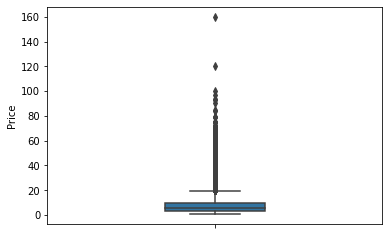

In [326]:
sns.boxplot(y='Price', data=df, width=.3)

In [327]:
Mean=df['Price'].mean()
sd=df['Price'].std()
print(Mean,sd)
df['Z_scr']=(df['Price']-Mean)/sd
df1=df.loc[df['Z_scr'].abs()<3]
df.head()
#sns.boxplot(y='Price', data=df1, width=.3)

9.603918596730235 11.249453218098994


,Name,Location,Year,Km,Fuel,Transmission,Ownership,Mileage,Engine,Power,Seats,Price,Make,Model,Version,Drop Version,Z_scr
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R,,LXI,-0.698160
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6,CRDi,0.257442
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V,None,-0.453704
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI,None,-0.320364
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New,2.0,0.723242


In [328]:
Models=df.Model.value_counts().sort_values(ascending=False).head(20).keys()

In [329]:
df['Age']=2021-df['Year']
df=df[['Price','Km','Age','Mileage', 'Engine', 'Power','Location', 'Fuel',  'Ownership', 'Make']]
df["Ownership"]=df["Ownership"].str.replace('First','1').str.replace('Second','2').str.replace('Third','3').str.replace('Fourth & Above','4').astype('int')
df.head()

<ipython-input-329-08bfb6a1cd49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ownership"]=df["Ownership"].str.replace('First','1').str.replace('Second','2').str.replace('Third','3').str.replace('Fourth & Above','4').astype('int')


,Price,Km,Age,Mileage,Engine,Power,Location,Fuel,Ownership,Make
0,1.75,72000,11,26.60,998.0,58.16,Mumbai,CNG,1,Maruti
1,12.50,41000,6,19.67,1582.0,126.20,Pune,Diesel,1,Hyundai
2,4.50,46000,10,18.20,1199.0,88.70,Chennai,Petrol,1,Honda
3,6.00,87000,9,20.77,1248.0,88.76,Chennai,Diesel,1,Maruti
4,17.74,40670,8,15.20,1968.0,140.80,Coimbatore,Diesel,2,Audi


<AxesSubplot:xlabel='Location', ylabel='Average prices in lakh'>

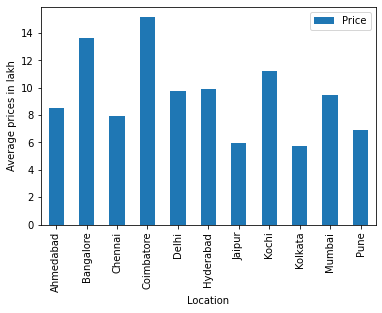

In [330]:
Plot=pd.pivot_table(df,index=['Location'],columns=None,aggfunc={'Price':'mean'})
Plot.plot(kind='bar',stacked=False, ylabel='Average prices in lakh')

<AxesSubplot:xlabel='Location', ylabel='Price'>

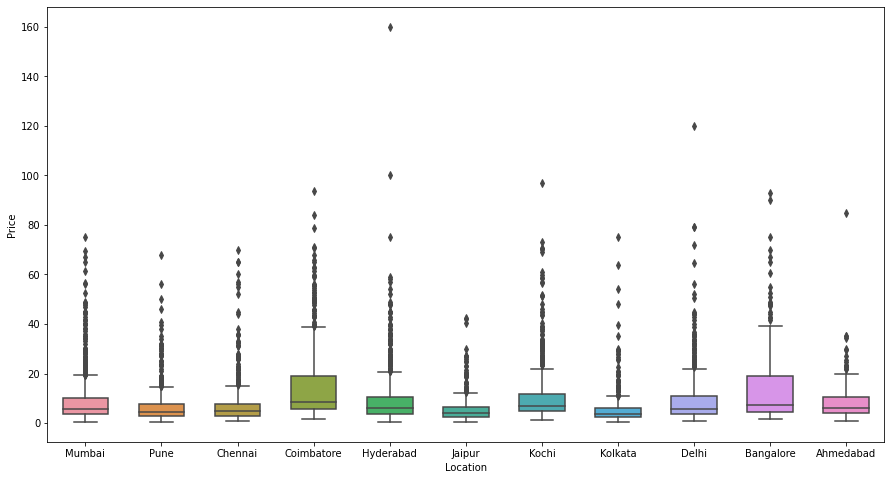

In [331]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.Location,y=df.Price,data=df,width=.6)

<AxesSubplot:xlabel='Fuel', ylabel='Average prices in lakh'>

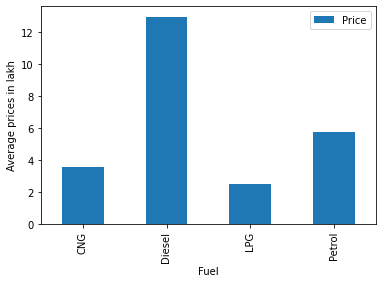

In [332]:
Plot=pd.pivot_table(df,index="Fuel",columns=None,aggfunc={'Price':'mean'})
Plot.plot(kind='bar',stacked=False, ylabel='Average prices in lakh')

(0.0, 200000.0)

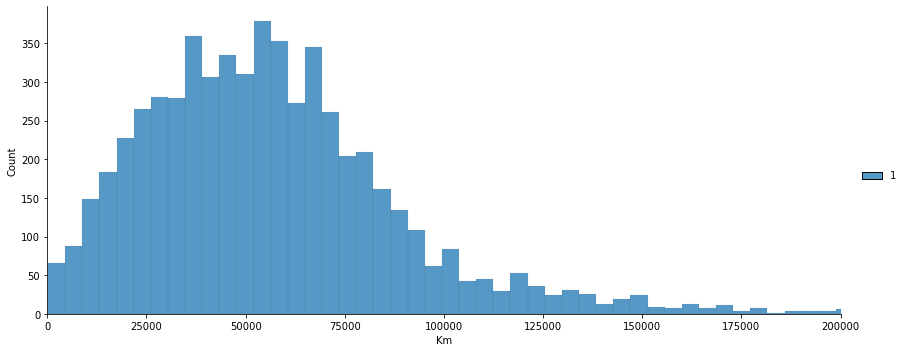

In [333]:
sns.displot(x=df.Km,data=df, hue=1,aspect=2.4)
plt.xlim(0,200000)

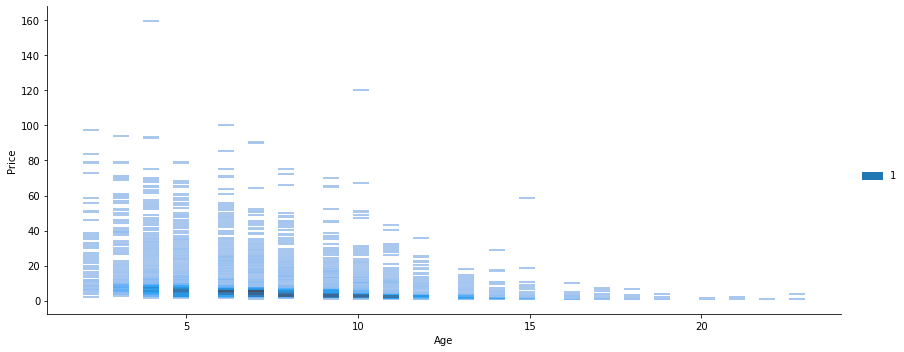

In [334]:
sns.displot(x="Age",y=df.Price,data=df, hue=1,aspect=2.4)

<AxesSubplot:>

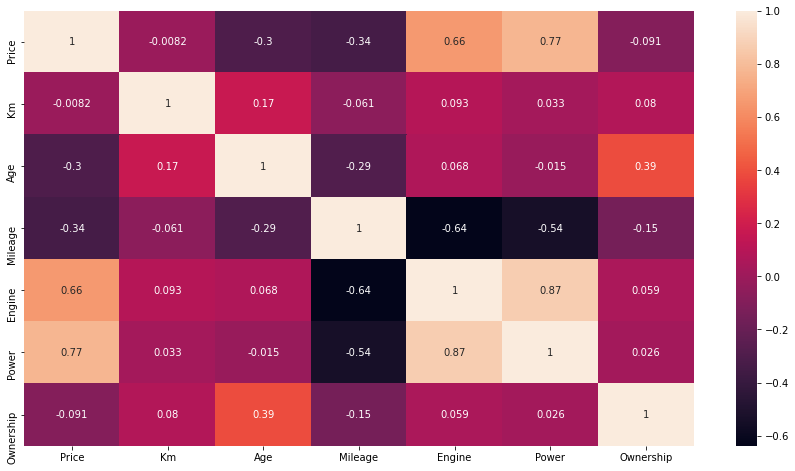

In [335]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Make', ylabel='Average prices in lakh'>

<Figure size 720x144 with 0 Axes>

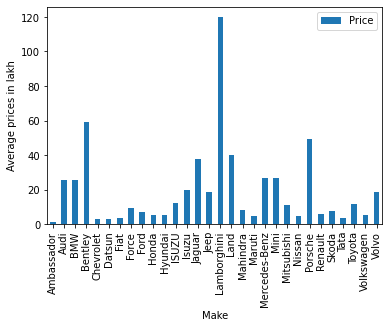

In [366]:
plt.figure(figsize=(10,2))
Plot=pd.pivot_table(df,index=['Make'],columns=None,aggfunc={'Price':'mean'})
Plot.plot(kind='bar',stacked=False, ylabel='Average prices in lakh')

In [337]:
dummies = pd.get_dummies(df,columns=['Location','Fuel','Make'])
dummies


,Price,Km,Age,Mileage,Engine,Power,Ownership,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,1.75,72000,11,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12.50,41000,6,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.50,46000,10,18.20,1199.0,88.70,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.00,87000,9,20.77,1248.0,88.76,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,17.74,40670,8,15.20,1968.0,140.80,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.75,27365,7,28.40,1248.0,74.00,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6015,4.00,100000,6,24.40,1120.0,71.00,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6016,2.90,55000,9,14.00,2498.0,112.00,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6017,2.65,46000,8,18.90,998.0,67.10,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [338]:
dummies_to_drop=['Location_Pune','Fuel_CNG','Make_Volvo']
try:
    dummies.drop(columns=dummies_to_drop,inplace=True)
except:
    pass
final=dummies

In [339]:
final.head(5)

,Price,Km,Age,Mileage,Engine,Power,Ownership,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen
0,1.75,72000,11,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,12.50,41000,6,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.50,46000,10,18.20,1199.0,88.70,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.00,87000,9,20.77,1248.0,88.76,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,17.74,40670,8,15.20,1968.0,140.80,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [340]:
X=final.drop(columns='Price')

In [341]:
y=final.Price
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5872, dtype: float64

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [343]:
print(str(len(X_train))+" "+str(len(y_train))+'\n'+str(len(X_test))+" "+str(len(y_test)))
X_train

4697 4697
1175 1175


,Km,Age,Mileage,Engine,Power,Ownership,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen
2080,71000,7,19.08,1582.0,126.32,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5728,43600,12,10.93,3498.0,272.00,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3213,62088,6,18.60,1197.0,85.80,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
217,44000,9,19.81,1086.0,68.05,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3832,115000,11,17.92,1086.0,62.10,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,57818,6,23.10,998.0,67.04,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5324,59261,6,24.00,1186.0,73.97,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5359,51000,4,25.40,1186.0,73.97,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5526,30000,4,22.70,1498.0,89.84,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [344]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()

In [345]:
model.fit(X_train,y_train)

LinearRegression()

In [346]:
model.score(X_train,y_train)

0.7847983819174197

In [347]:
model.score(X_test,y_test)

0.7386159711695557

In [348]:
y_pred=model.predict(X_test)

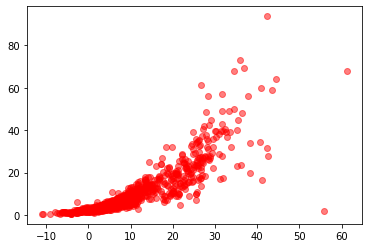

In [349]:
plt.scatter(y_pred, y_test,c="red", alpha=0.5)

(array([ 28., 264., 545., 133., 103.,  75.,  17.,   8.,   0.,   2.]),
 array([-10.97821973,  -3.76278101,   3.45265771,  10.66809642,
         17.88353514,  25.09897386,  32.31441258,  39.5298513 ,
         46.74529002,  53.96072873,  61.17616745]),
 <BarContainer object of 10 artists>)

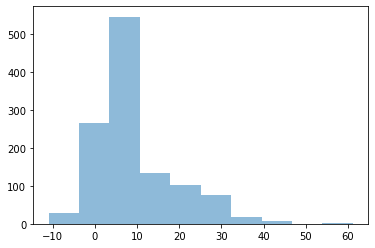

In [350]:
plt.hist(y_pred, alpha=0.5,bins=None, label='-')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

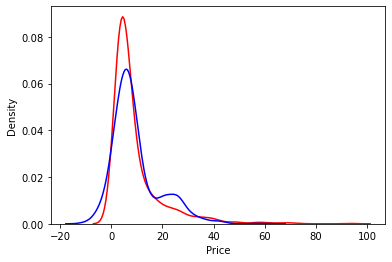

<Figure size 792x576 with 0 Axes>

In [351]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
plt.figure(figsize=(11,8))
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Saving Model to File

In [352]:
import pickle

In [353]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

In [354]:
dummies

,Price,Km,Age,Mileage,Engine,Power,Ownership,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen
0,1.75,72000,11,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,12.50,41000,6,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.50,46000,10,18.20,1199.0,88.70,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.00,87000,9,20.77,1248.0,88.76,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,17.74,40670,8,15.20,1968.0,140.80,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.75,27365,7,28.40,1248.0,74.00,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6015,4.00,100000,6,24.40,1120.0,71.00,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6016,2.90,55000,9,14.00,2498.0,112.00,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6017,2.65,46000,8,18.90,998.0,67.10,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [355]:
dft=df
sav=pd.concat([dft,dummies.iloc[:,5:]],axis=1)
sav
sav.to_csv('data.csv')